<a href="https://colab.research.google.com/github/ghedin-alison/NLP/blob/main/Aula_3_6_IA_PLN_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Processamento de Linguagem Natural**

---


## Stemmer (Stemização)

---

In [80]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
exemplos = ["connection","connections","connective","connecting","connected"]
print(exemplos)

for word in exemplos:
  print(ps.stem(word))

['connection', 'connections', 'connective', 'connecting', 'connected']
connect
connect
connect
connect
connect


In [81]:
# Outro exemplo
ps = PorterStemmer()
exemplos = ["go","going","goes","gone","went"]
print(exemplos)

for word in exemplos:
  print(ps.stem(word))

['go', 'going', 'goes', 'gone', 'went']
go
go
goe
gone
went


## Removedor de Sufixos da lingua portuguesa

### Cuidado ao utilizar stemmer, geralmente usar depois da remoção de stop words. Talvez seria melhor usar Lemmatização com a biblioteca space.

In [82]:
# Stemização
from nltk.stem import PorterStemmer
from nltk.stem.rslp import RSLPStemmer
import nltk 
nltk.download('rslp')

doc = ["pedra","pedreira","pedreiro"]
print(doc)

ps = PorterStemmer()
rslp = RSLPStemmer()

for word in doc:
    print(f"{ps.stem(word)} - {rslp.stem(word)}")

['pedra', 'pedreira', 'pedreiro']
pedra - pedr
pedreira - pedr
pedreiro - pedr


[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


## Aplicar Stemmer em uma frase

In [83]:
import pandas as pd

df = pd.DataFrame({
    'text': [
      'Sobre MBA? Eu gostei muito do MBA da FIAP',
      'O MBA da FIAP pode melhorar, não gostei muito'
    ],
    'class': [
        'positivo',
        'negativo'
    ]})

df.head()

,text,class
0,Sobre MBA? Eu gostei muito do MBA da FIAP,positivo
1,"O MBA da FIAP pode melhorar, não gostei muito",negativo


In [84]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

df['tokens'] = df.text.apply(word_tokenize)
df['tokens']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [Sobre, MBA, ?, Eu, gostei, muito, do, MBA, da...
1    [O, MBA, da, FIAP, pode, melhorar, ,, não, gos...
Name: tokens, dtype: object

In [85]:
from nltk.stem import PorterStemmer
from nltk.stem.rslp import RSLPStemmer
import nltk
nltk.download('rslp')

tokens = df.tokens[0]
tokens = tokens + df.tokens[1]

ps = PorterStemmer()
rslp = RSLPStemmer()

for tok in tokens:
  #print('Original: %s \t\t  PorterStemmer: %s \t\t RSLPStemmer: %s' % (tok, ps.stem(tok), rslp.stem(tok)))
  print(f'Original: {tok:{11}} PorterStemmer: {ps.stem(tok):{10}} RSLPStemmer: {rslp.stem(tok):{10}}')


Original: Sobre       PorterStemmer: sobr       RSLPStemmer: sobr      
Original: MBA         PorterStemmer: mba        RSLPStemmer: mba       
Original: ?           PorterStemmer: ?          RSLPStemmer: ?         
Original: Eu          PorterStemmer: eu         RSLPStemmer: eu        
Original: gostei      PorterStemmer: gostei     RSLPStemmer: gost      
Original: muito       PorterStemmer: muito      RSLPStemmer: muit      
Original: do          PorterStemmer: do         RSLPStemmer: do        
Original: MBA         PorterStemmer: mba        RSLPStemmer: mba       
Original: da          PorterStemmer: da         RSLPStemmer: da        
Original: FIAP        PorterStemmer: fiap       RSLPStemmer: fiap      
Original: O           PorterStemmer: o          RSLPStemmer: o         
Original: MBA         PorterStemmer: mba        RSLPStemmer: mba       
Original: da          PorterStemmer: da         RSLPStemmer: da        
Original: FIAP        PorterStemmer: fiap       RSLPStemmer: fia

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [86]:
# O Porter foi criado para o inglês e o RSLP para o português

NLTK = Natural Language Tool Kit

RSLP = Removedor de Sulfixos da Língua Portuguesa


## Quantos unigramas existem após aplicar Stemmer?

In [87]:
' '.join(['Anderson', 'Dourado'])

'Anderson Dourado'

In [88]:
from nltk.stem.rslp import RSLPStemmer
from sklearn.feature_extraction.text import CountVectorizer

rslp = RSLPStemmer()

def stem_pandas(line):
  return ' '.join([rslp.stem(token) for token in line])

df['stemmer'] = df.tokens.apply(stem_pandas)

df.stemmer.head()

0      sobr mba ? eu gost muit do mba da fiap
1    o mba da fiap pod melhor , não gost muit
Name: stemmer, dtype: object

In [89]:
import nltk

vect = CountVectorizer(ngram_range=(1,1))
vect.fit(df.stemmer)

text_vect = vect.transform(df.stemmer)

print('UNIGRAMAS', text_vect.shape[1])

#print(text_vect.shape[0])
#print(text_vect.shape[1])

UNIGRAMAS 11


Unigramas sem aplicar o stemmer

In [90]:
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese')
vect = CountVectorizer(ngram_range=(1,1), stop_words=stopwords)
vect.fit(df.text)

text_vect = vect.transform(df.text)

print('UNIGRAMAS sem STOPWORDS', text_vect.shape[1])

UNIGRAMAS sem STOPWORDS 6


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
# Não diferença pois o texto não tem muitas variações de palavras que possam ser reduzidas

Outra função de stematização do NLTK

## Snowball é um bom stemmer para linguas estrangeiras.

In [92]:
from nltk.stem import SnowballStemmer

print(" ".join(SnowballStemmer.languages)) # See which languages are supported

arabic danish dutch english finnish french german hungarian italian norwegian porter portuguese romanian russian spanish swedish


In [93]:
stemmer = SnowballStemmer("portuguese") # Escolha a linguagem

palavras = ['pedra','pedreira','criar']

for p in palavras:
  print(stemmer.stem(p)) # Stem a palavra

pedr
pedreir
cri


## Lemmatizer (Lematização)

---

In [94]:
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
import nltk

exemplos = ["connection","connections","connective","connecting","connected"]
wnl = WordNetLemmatizer()

for word in exemplos:
    print(wnl.lemmatize(word,"v"))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


connection
connections
connective
connect
connect


[nltk_data]   Package omw-1.4 is already up-to-date!


In [95]:
exemplos = ["go","going","goes","gone","went"]
wnl = WordNetLemmatizer()

for word in exemplos:
  print(wnl.lemmatize(word,"v"))

go
go
go
go
go


Vamos ver lematização em palavras do português mais para frente, pois o NLTK não possui lematização em português.


## Contagem de Termos - UNIGRAMA

---

In [96]:
import pandas as pd

df = pd.DataFrame({
    'text': [
      'Sobre MBA ? Eu gostei muito do MBA da FIAP',
      'O MBA da FIAP pode melhorar, não gostei muito'
    ],
    'class': [
        'positivo',
        'negativo'
    ]})

In [97]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1,1))
#vect = CountVectorizer(ngram_range=(1,2))
#vect.fit(df.text)
count_vect = vect.fit_transform(df.text)

#print(pd.DataFrame(count_vect.A, columns=vect.get_feature_names()).T.to_string())
pd.DataFrame(count_vect.A, columns=vect.get_feature_names_out())

,da,do,eu,fiap,gostei,mba,melhorar,muito,não,pode,sobre
0,1,1,1,1,1,2,0,1,0,0,1
1,1,0,0,1,1,1,1,1,1,1,0


## TF

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ao usar o TfidfVectorizer() o default ngram_range=unigrama, use_idf=True, norm='l2', lowercase=True, max_df e min_df=1, smooth_idf=True, sublinear_tf=False
vect = TfidfVectorizer(ngram_range=(1,1), use_idf=False, norm='l1')
vect.fit(df.text)
tf_vect = vect.transform(df.text)

print(pd.DataFrame(tf_vect.A, columns=vect.get_feature_names_out()).to_string())

         da        do        eu      fiap    gostei       mba  melhorar     muito    não   pode     sobre
0  0.111111  0.111111  0.111111  0.111111  0.111111  0.222222     0.000  0.111111  0.000  0.000  0.111111
1  0.125000  0.000000  0.000000  0.125000  0.125000  0.125000     0.125  0.125000  0.125  0.125  0.000000


In [99]:
#vect.get_stop_words()
#vect.get_params(deep=True)

## TF-IDF


In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ao usar o TfidfVectorizer() o default ngram_range=unigrama, use_idf=True, norm='l2', lowercase=True, max_df e min_df=1, smooth_idf=True, sublinear_tf=False
vect = TfidfVectorizer()
vect.fit(df.text)
tfidf_vect = vect.transform(df.text)

print(pd.DataFrame(tfidf_vect.A, columns=vect.get_feature_names_out()).T.to_string())

                 0         1
da        0.267970  0.302531
do        0.376623  0.000000
eu        0.376623  0.000000
fiap      0.267970  0.302531
gostei    0.267970  0.302531
mba       0.535941  0.302531
melhorar  0.000000  0.425196
muito     0.267970  0.302531
não       0.000000  0.425196
pode      0.000000  0.425196
sobre     0.376623  0.000000


Existe uma diferenca no cálculo original do TF-IDF apresentados pelos livros em relação ao padrão urilizado pelo Scikit Learn. A ideia dessa diferença é evitar divisões por zero.

Formúla original:

    TF-IDFw1 = TFw1 * IDFw1
    IDFw1 = loge(D/Dw1)
    D = total de documentos | Dw1 = Quantidade de documentos em que o termo aparece

----
Formúla do sklearn:
Muda o cálculo do IDFw1

    IDFw! = loge(1+D/1+Dw1)+1

Com o paâmetro smooth_idf=False

    IDFw! = loge(D/Dw1)+1



In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ao usar o TfidfVectorizer() o default ngram_range=unigrama, use_idf=True, norm='l2', lowercase=True, max_df e min_df=1, smooth_idf=True, sublinear_tf=False
vect = TfidfVectorizer(smooth_idf=False)
#vect = TfidfVectorizer(smooth_idf=False, max_df=1, min_df=1)
vect.fit(df.text)
tfidf_vect = vect.transform(df.text)

print(pd.DataFrame(tfidf_vect.A, columns=vect.get_feature_names_out()).T.to_string())

                 0         1
da        0.245439  0.271161
do        0.415564  0.000000
eu        0.415564  0.000000
fiap      0.245439  0.271161
gostei    0.245439  0.271161
mba       0.490877  0.271161
melhorar  0.000000  0.459115
muito     0.245439  0.271161
não       0.000000  0.459115
pode      0.000000  0.459115
sobre     0.415564  0.000000


In [102]:
'''
tfidf_vect.data
tfidf_vect.A
vect.get_feature_names()
'''

'\ntfidf_vect.data\ntfidf_vect.A\nvect.get_feature_names()\n'

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer


https://scikit-learn.org/stable/modules/feature_extraction.html

O cáculo do TF-IDF das classes TfidfTransformer e TfidfVectorizer do scikit-learn diferem ligeiramente da notação padrão de livros didáticos que define o IDF.


#**Modelo com n-grama**
---

In [103]:
df

,text,class
0,Sobre MBA ? Eu gostei muito do MBA da FIAP,positivo
1,"O MBA da FIAP pode melhorar, não gostei muito",negativo


In [104]:
df['class']

0    positivo
1    negativo
Name: class, dtype: object

###Transformando os textos/dados em uma "linguagem" para o modelo

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ao usar o TfidfVectorizer() o default ngram_range=unigrama, use_idf=True, norm='l2', lowercase=True, max_df e min_df=1, smooth_idf=True, sublinear_tf=False
vect = TfidfVectorizer()
vect.fit(df.text)
tfidf_vect = vect.transform(df.text)

print(pd.DataFrame(tfidf_vect.A, columns=vect.get_feature_names_out()).to_string())

         da        do        eu      fiap    gostei       mba  melhorar     muito       não      pode     sobre
0  0.267970  0.376623  0.376623  0.267970  0.267970  0.535941  0.000000  0.267970  0.000000  0.000000  0.376623
1  0.302531  0.000000  0.000000  0.302531  0.302531  0.302531  0.425196  0.302531  0.425196  0.425196  0.000000


###Treinando um modelo de Árvore de Decisão


In [106]:
# treinando um modelo de árevore de decisão
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(tfidf_vect, df['class'])

print(f"Score Decision Tree:  {tree.score(tfidf_vect, df['class'])}") # retorna a acurracy - precisão do modelo

Score Decision Tree:  1.0


In [107]:
#tree.score(tfidf_vect, df['class'])

###Aplicando o conhecimento do modelo em um novo documento

In [108]:
vetor = vect.transform(['o curso pode melhorar'])
vetor.A
pd.DataFrame(vetor.A, columns=vect.get_feature_names_out())



,da,do,eu,fiap,gostei,mba,melhorar,muito,não,pode,sobre
0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.0,0.0,0.707107,0.0


In [109]:
f'D Tree: {tree.predict(vetor)}'

"D Tree: ['negativo']"

# **Montando nossa amostra**

---

In [110]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# mostrar a estrutura de pastas do google drive montado
!ls -la
!ls -la gdrive/MyDrive/FIAP/NLP/dados

Mounted at /content/gdrive
total 20
drwxr-xr-x 1 root root 4096 Mar 12 18:33 .
drwxr-xr-x 1 root root 4096 Mar 12 16:46 ..
drwxr-xr-x 4 root root 4096 Mar  9 18:57 .config
drwx------ 5 root root 4096 Mar 12 18:33 gdrive
drwxr-xr-x 1 root root 4096 Mar  9 18:58 sample_data
total 3688
-rw------- 1 root root 3776170 Feb 15  2020 produtos.csv


Selecionando dados aleatórios direto do arquivo

In [111]:
import pandas as pd

df = pd.read_csv(
    "gdrive/MyDrive/FIAP/NLP/dados/produtos.csv",
    delimiter=";",
    encoding='utf-8'
  ).sample(frac=0.5, random_state=42)

df.dropna(inplace=True)
df["texto"] = df['nome'] + " " + df['descricao']
df.describe()

#df.sample(frac=0.5, random_state=42)

,nome,descricao,categoria,texto
count,1424,1424,1424,1424
unique,1307,1257,4,1320
top,Boneco Dragon Ball Z Son Gokou,JOGO ORIGINAL. NOVO. LACRADO. PRONTA ENTREGA. ...,livro,Box A Garota Do Calendário Novo No Plástico F...
freq,11,19,411,11


In [112]:
'''
df = pd.read_csv(
    "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", delimiter=";", encoding='utf-8'
  ).sample(frac=0.5, random_state=42)
'''

'\ndf = pd.read_csv(\n    "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", delimiter=";", encoding=\'utf-8\'\n  ).sample(frac=0.5, random_state=42)\n'

In [113]:
'''
df = pd.read_csv(
    "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", delimiter=";", encoding='utf-8'
  ).sample(1000)
'''

'\ndf = pd.read_csv(\n    "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", delimiter=";", encoding=\'utf-8\'\n  ).sample(1000)\n'

## Divisão do dataframe em amostras treino e teste

## Modelo padrão

In [142]:
import pandas as pd

df = pd.read_csv("gdrive/MyDrive/FIAP/NLP/dados/produtos.csv", delimiter=";", encoding='utf-8')

df.dropna(inplace=True)

df["texto"] = df['nome'] + " " + df['descricao']

df.describe()

,nome,descricao,categoria,texto
count,2916,2916,2916,2916
unique,2584,2460,4,2646
top,Boneco Dragon Ball Z Son Gokou,JOGO ORIGINAL. NOVO. LACRADO. PRONTA ENTREGA. ...,livro,Boneco Dragon Ball Z Son Gokou Produto novo
freq,20,39,838,20


In [148]:
from sklearn.model_selection import train_test_split

# divisão da amostra entre treino e teste
df_train, df_test = train_test_split(
      df, 
      test_size = 0.3,
      random_state = 42
  )

Analisando a distribuição das amostras em relação ao total

In [149]:
print("Original")
print(df.categoria.value_counts())
print("\nTreino")
print(df_train.categoria.value_counts())
print("\nTeste")
print(df_test.categoria.value_counts())

Original
livro        838
maquiagem    788
brinquedo    668
game         622
Name: categoria, dtype: int64

Treino
livro        577
maquiagem    558
brinquedo    478
game         428
Name: categoria, dtype: int64

Teste
livro        261
maquiagem    230
game         194
brinquedo    190
Name: categoria, dtype: int64


In [150]:
print("Original")
print(df.categoria.value_counts()/df.shape[0])
print("\nTreino")
print(df_train.categoria.value_counts()/df_train.shape[0])
print("\nTeste")
print(df_test.categoria.value_counts()/df_test.shape[0])

Original
livro        0.287380
maquiagem    0.270233
brinquedo    0.229081
game         0.213306
Name: categoria, dtype: float64

Treino
livro        0.282705
maquiagem    0.273395
brinquedo    0.234199
game         0.209701
Name: categoria, dtype: float64

Teste
livro        0.298286
maquiagem    0.262857
game         0.221714
brinquedo    0.217143
Name: categoria, dtype: float64


<AxesSubplot:>

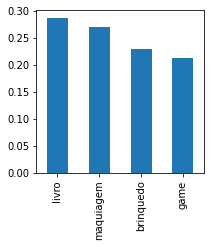

In [151]:
(df.categoria.value_counts()/df.shape[0]).plot(kind='bar', figsize=(3,3))

<AxesSubplot:>

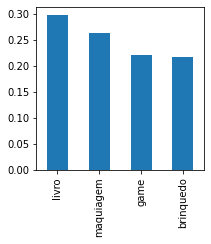

In [152]:
(df_test.categoria.value_counts()/df_test.shape[0]).plot(kind='bar', figsize=(3,3))

## Outra forma: seria separando cada objeto já tratado

## Não é recomendado fazer a vetorização antes de separar, pq vetoriza toda a base e cria viés.

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(df.texto)
text_vect = vect.transform(df.texto)

# divisão da amostra entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(
      text_vect, 
      df["categoria"], 
      test_size = 0.3, 
      random_state = 42
  )

Analisando a distribuição das amostras em relação ao total

In [154]:
print("Original")
print(df.categoria.value_counts()/df.shape[0])
print("\nTreino")
print(y_train.value_counts()/y_train.shape[0])
print("\nTeste")
print(y_test.value_counts()/y_test.shape[0])

Original
livro        0.287380
maquiagem    0.270233
brinquedo    0.229081
game         0.213306
Name: categoria, dtype: float64

Treino
livro        0.282705
maquiagem    0.273395
brinquedo    0.234199
game         0.209701
Name: categoria, dtype: float64

Teste
livro        0.298286
maquiagem    0.262857
game         0.221714
brinquedo    0.217143
Name: categoria, dtype: float64


Testando o modelo de uma forma mais simples

# Pipeline de referência!!!

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# carregar dataframe
df = pd.read_csv(
    "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", delimiter=";", encoding='utf-8'
  )

# limpeza inicial (normalização)
df.dropna(inplace=True)
df["texto"] = df['nome'] + " " + df['descricao']

# divisão da amostra entre treino e teste
df_train, df_test = train_test_split(
      df, 
      test_size = 0.3,
      random_state = 42
  )

### Aqui podemos aplicar normalização, Lematização e outras técnicas na base de treino.

# vetorização do dataframe de treino
vect = CountVectorizer()
vect.fit(df_train.texto) ## objeto que será salvo pra utilizar num pipeline de produção
X_train = vect.transform(df_train.texto)
y_train = df_train["categoria"]

# treinamento do modelo ávore de decisão com o dataframe de treino
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train) ## objeto que será salvo pra utilizar num pipeline de produção

# transforma o dataframe de teste em vetor (features)
X_test = vect.transform(df_test.texto)

# escoragem da classificação na amostra de teste
y_prediction = tree.predict(X_test)

# mensuração do resultado pela acurácia
y_test = df_test["categoria"]
accuracy = accuracy_score(y_prediction, y_test)
print(accuracy)

0.9565714285714285


In [123]:
print(" ")
print(X_train.shape)
print(X_test.shape)

 
(2041, 29957)
(875, 29957)


In [124]:
vect.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [163]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

Salvando o modelo treinado e o vetor de transformação.

In [126]:
import pickle

pickle.dump(tree, open('minhaarvore.pkl', 'wb'))
pickle.dump(vect, open('vetorizador.pkl', 'wb'))

In [164]:
!ls -la

total 464
drwxr-xr-x 1 root root   4096 Mar 12 18:33 .
drwxr-xr-x 1 root root   4096 Mar 12 16:46 ..
drwxr-xr-x 4 root root   4096 Mar  9 18:57 .config
drwx------ 5 root root   4096 Mar 12 18:33 gdrive
-rw-r--r-- 1 root root  14588 Mar 12 18:33 minhaarvore.pkl
drwxr-xr-x 1 root root   4096 Mar  9 18:58 sample_data
-rw-r--r-- 1 root root 438158 Mar 12 18:33 vetorizador.pkl


In [165]:
vetorizador_bla = pickle.load(open('vetorizador.pkl', 'rb'))
modelo_classificador_bla = pickle.load(open('minhaarvore.pkl', 'rb'))

In [167]:
vetor_teste = vetorizador_bla.transform(df_test.texto)

In [168]:
print('D Tree: ', modelo_classificador_bla.predict(vetor_teste)) # texto = vetor

D Tree:  ['maquiagem' 'brinquedo' 'game' 'maquiagem' 'maquiagem' 'livro' 'game'
 'livro' 'game' 'game' 'brinquedo' 'brinquedo' 'brinquedo' 'brinquedo'
 'game' 'brinquedo' 'game' 'game' 'livro' 'game' 'maquiagem' 'brinquedo'
 'game' 'maquiagem' 'game' 'maquiagem' 'livro' 'maquiagem' 'maquiagem'
 'maquiagem' 'game' 'livro' 'livro' 'game' 'game' 'game' 'brinquedo'
 'brinquedo' 'maquiagem' 'brinquedo' 'game' 'maquiagem' 'livro' 'game'
 'livro' 'game' 'brinquedo' 'brinquedo' 'livro' 'livro' 'maquiagem'
 'livro' 'livro' 'brinquedo' 'maquiagem' 'brinquedo' 'livro' 'brinquedo'
 'livro' 'brinquedo' 'game' 'livro' 'game' 'livro' 'livro' 'livro'
 'maquiagem' 'livro' 'brinquedo' 'brinquedo' 'game' 'brinquedo' 'livro'
 'game' 'brinquedo' 'livro' 'livro' 'livro' 'game' 'game' 'game' 'game'
 'maquiagem' 'maquiagem' 'brinquedo' 'maquiagem' 'maquiagem' 'maquiagem'
 'brinquedo' 'livro' 'brinquedo' 'brinquedo' 'livro' 'livro' 'livro'
 'maquiagem' 'brinquedo' 'brinquedo' 'game' 'game' 'brinquedo' 'maquiag

In [169]:
texto = """
Maleta Exclusiva Ruby Rose Profissional Completa.
"""

texto_vetor = vetorizador_bla.transform([texto])

In [170]:
modelo_classificador_bla.predict(texto_vetor)

array(['maquiagem'], dtype=object)

Salvando no google drive

In [171]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# mostrar a estrutura de pastas do google drive montado
!ls -la

Mounted at /content/gdrive
total 464
drwxr-xr-x 1 root root   4096 Mar 12 21:08 .
drwxr-xr-x 1 root root   4096 Mar 12 16:46 ..
drwxr-xr-x 4 root root   4096 Mar  9 18:57 .config
drwx------ 5 root root   4096 Mar 12 21:08 gdrive
-rw-r--r-- 1 root root  14588 Mar 12 18:33 minhaarvore.pkl
drwxr-xr-x 1 root root   4096 Mar  9 18:58 sample_data
-rw-r--r-- 1 root root 438158 Mar 12 18:33 vetorizador.pkl


In [174]:
# Exemplo salvando no google drive
import pickle

pickle.dump(tree, open('/content/gdrive/My Drive/FIAP/NLP/minhaarvore.pkl', 'wb'))
pickle.dump(vect, open('/content/gdrive/My Drive/FIAP/NLP/vetorizador.pkl', 'wb'))